# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
#For Unzipping the file from google drive to colab cloud
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CSST106/Aquarium Combined.v2-raw-1024.yolov8.zip", "r")
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 31.9 MB/s eta 0:00:00


## Model Building

In [ ]:
from ultralytics import YOLO
import os

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/valid'
test_dir = '/content/dataset/test'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import cv2
import glob

def preprocess_images(input_folder, output_folder, img_size=(640, 640)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for img_path in glob.glob(f"{input_folder}/*.jpg"):
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        normalized_img = img / 255.0  # Normalize pixel values to [0, 1]
        cv2.imwrite(os.path.join(output_folder, os.path.basename(img_path)), normalized_img * 255)

preprocess_images(train_dir, '/content/dataset/train_preprocessed')
preprocess_images(val_dir, '/content/dataset/val_preprocessed')
preprocess_images(test_dir, '/content/dataset/test_preprocessed')

# Training the Model

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model for transfer learning
model = YOLO('yolov8n.pt')

# Train the model with your dataset
model.train(data='/content/dataset/data.yaml', epochs=20, batch=16, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 138MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 29.8MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1393.50it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1651.80it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.543      3.723      1.299        199        640: 100%|██████████| 28/28 [07:04<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:43<00:00, 10.80s/it]

                   all        127        909     0.0139      0.553     0.0979     0.0544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.615      2.559      1.264        167        640: 100%|██████████| 28/28 [07:03<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.28s/it]

                   all        127        909      0.387     0.0466      0.169     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.572      2.284      1.267        116        640: 100%|██████████| 28/28 [06:52<00:00, 14.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.16s/it]

                   all        127        909      0.349      0.346        0.3      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.542      2.068      1.243        179        640: 100%|██████████| 28/28 [06:56<00:00, 14.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.91s/it]

                   all        127        909      0.337      0.368      0.333      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.538      1.918      1.256        221        640: 100%|██████████| 28/28 [06:53<00:00, 14.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.38s/it]

                   all        127        909      0.498       0.43      0.409      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.526      1.943      1.246        352        640: 100%|██████████| 28/28 [06:47<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.28s/it]

                   all        127        909      0.516      0.493      0.481      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.482      1.753      1.235        346        640: 100%|██████████| 28/28 [06:55<00:00, 14.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.20s/it]

                   all        127        909      0.633      0.524      0.527      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.478      1.637      1.209        156        640: 100%|██████████| 28/28 [06:50<00:00, 14.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.42s/it]

                   all        127        909      0.564       0.49      0.495      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.491      1.613      1.236        121        640: 100%|██████████| 28/28 [06:48<00:00, 14.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.32s/it]

                   all        127        909      0.589      0.599      0.592      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.415       1.54      1.174        215        640: 100%|██████████| 28/28 [06:58<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.74s/it]

                   all        127        909      0.671      0.566        0.6       0.35


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.388      1.679      1.176        132        640: 100%|██████████| 28/28 [06:50<00:00, 14.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.84s/it]

                   all        127        909      0.672      0.547      0.599      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.364      1.483      1.157         95        640: 100%|██████████| 28/28 [06:45<00:00, 14.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.29s/it]

                   all        127        909      0.636      0.551      0.599      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.359      1.467       1.17         83        640: 100%|██████████| 28/28 [06:44<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.17s/it]

                   all        127        909      0.699       0.57      0.637       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.315      1.369      1.146         98        640: 100%|██████████| 28/28 [06:47<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.19s/it]

                   all        127        909      0.686      0.623      0.667      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.311      1.345      1.125         80        640: 100%|██████████| 28/28 [06:44<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.29s/it]

                   all        127        909      0.729      0.668      0.707      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.314      1.349       1.15        120        640: 100%|██████████| 28/28 [06:45<00:00, 14.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.24s/it]

                   all        127        909      0.776      0.611      0.689      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.302      1.298      1.119        145        640: 100%|██████████| 28/28 [06:43<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.69s/it]

                   all        127        909      0.695      0.649      0.706       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.242      1.224        1.1        101        640: 100%|██████████| 28/28 [06:42<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.85s/it]

                   all        127        909      0.742      0.682       0.73      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.231      1.206      1.096        122        640: 100%|██████████| 28/28 [06:42<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.51s/it]

                   all        127        909      0.734      0.694      0.723      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.244      1.188      1.097         96        640: 100%|██████████| 28/28 [06:41<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.62s/it]

                   all        127        909      0.722      0.675      0.717      0.441



20 epochs completed in 2.512 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.28s/it]


                   all        127        909      0.749      0.682      0.731      0.442
                  fish         63        459      0.763      0.678      0.762      0.441
             jellyfish          9        155       0.83      0.914      0.926      0.531
               penguin         17        104      0.611      0.754      0.681      0.313
                puffin         15         74      0.493      0.419      0.472      0.232
                 shark         28         57      0.858      0.579      0.696      0.424
              starfish         17         27      0.904        0.7      0.792      0.579
              stingray         23         33      0.783      0.727      0.787      0.574
Speed: 4.2ms preprocess, 227.0ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d28a39eeb30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# Testing

In [ ]:
# Load the trained YOLOv8 model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Replace with the actual path to your trained model

In [ ]:
# Evaluate the model on the test set
results = model.val(data='/content/dataset/data.yaml', split='test')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/test/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 316.61it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.17s/it]


                   all         63        584      0.785       0.65      0.746      0.429
                  fish         30        249      0.768      0.594      0.712      0.405
             jellyfish         11        154      0.827      0.857      0.882      0.541
               penguin          7         82      0.662       0.61      0.704      0.295
                puffin          6         35      0.698        0.4      0.485      0.224
                 shark         14         38      0.873      0.724      0.787      0.501
              starfish          5         11      0.671      0.636      0.783      0.477
              stingray         10         15          1      0.732      0.873      0.559
Speed: 4.0ms preprocess, 222.7ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 22 penguins, 169.3ms
Speed: 3.8ms preprocess, 169.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


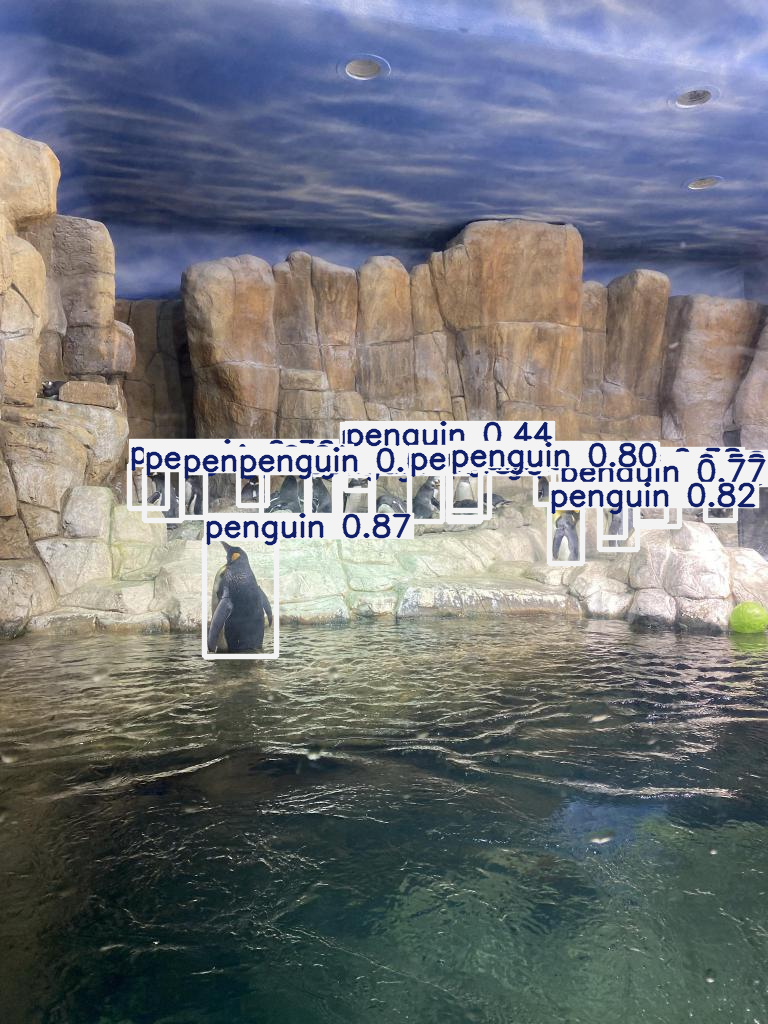


image 1/1 /content/dataset/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg: 640x480 5 fishs, 276.5ms
Speed: 4.9ms preprocess, 276.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


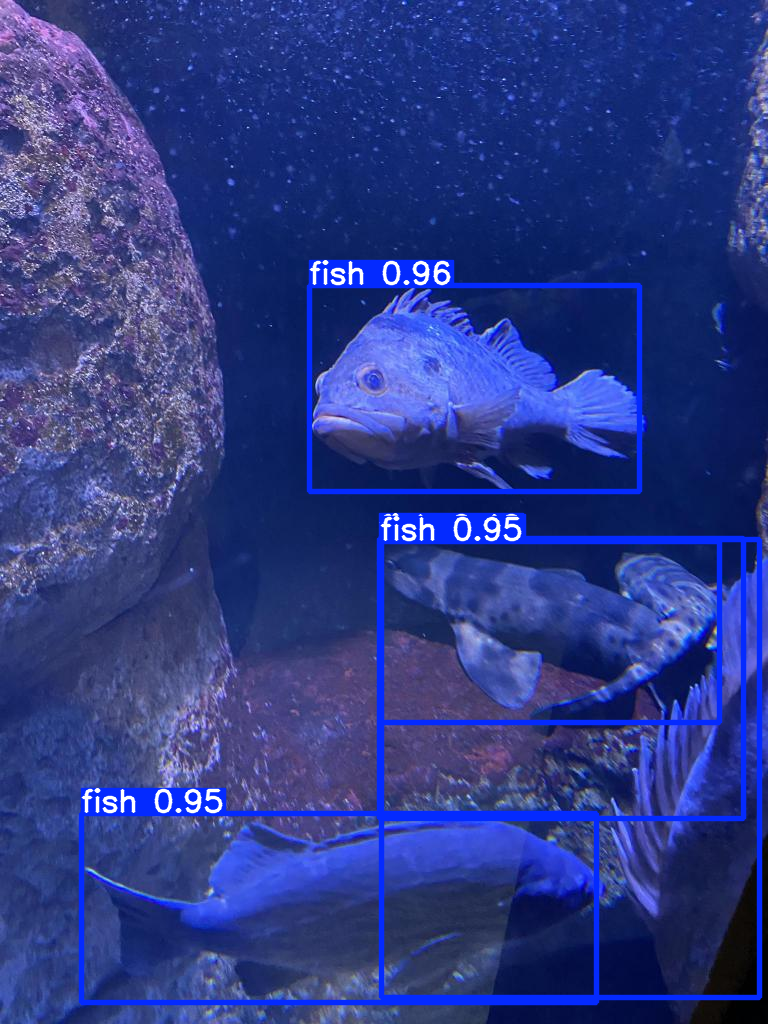


image 1/1 /content/dataset/test/images/IMG_8343_jpg.rf.2d88000497d74d72aedc118b125a0c07.jpg: 480x640 4 fishs, 257.7ms
Speed: 4.8ms preprocess, 257.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


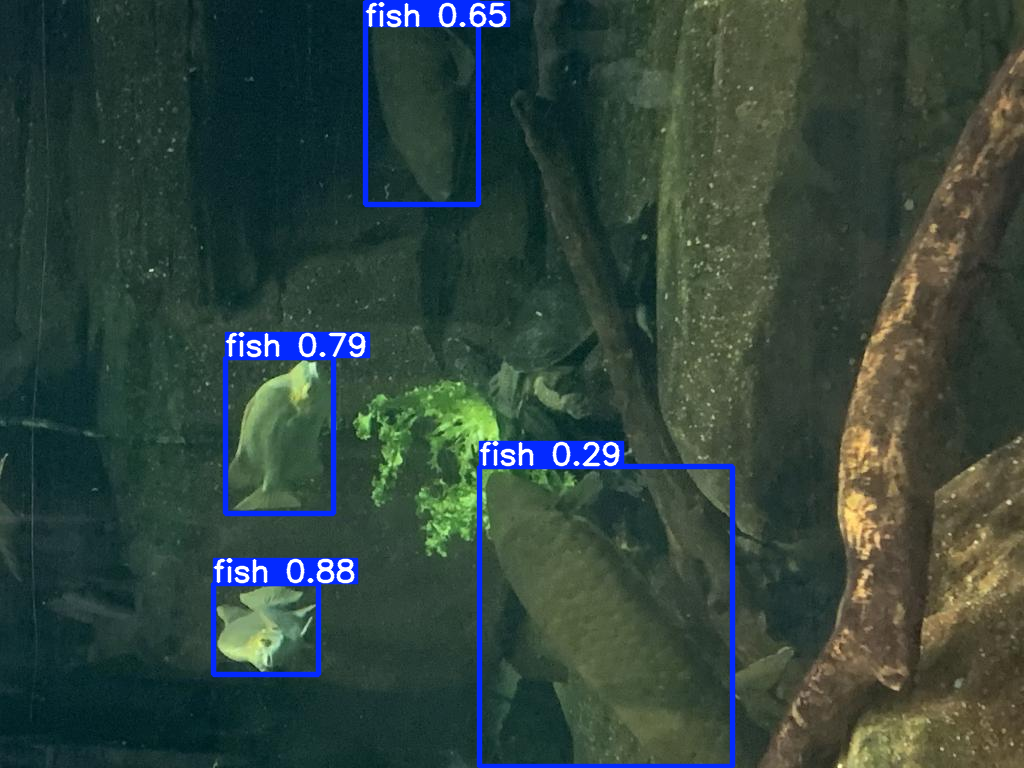


image 1/1 /content/dataset/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg: 640x480 3 fishs, 1 starfish, 287.4ms
Speed: 7.1ms preprocess, 287.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


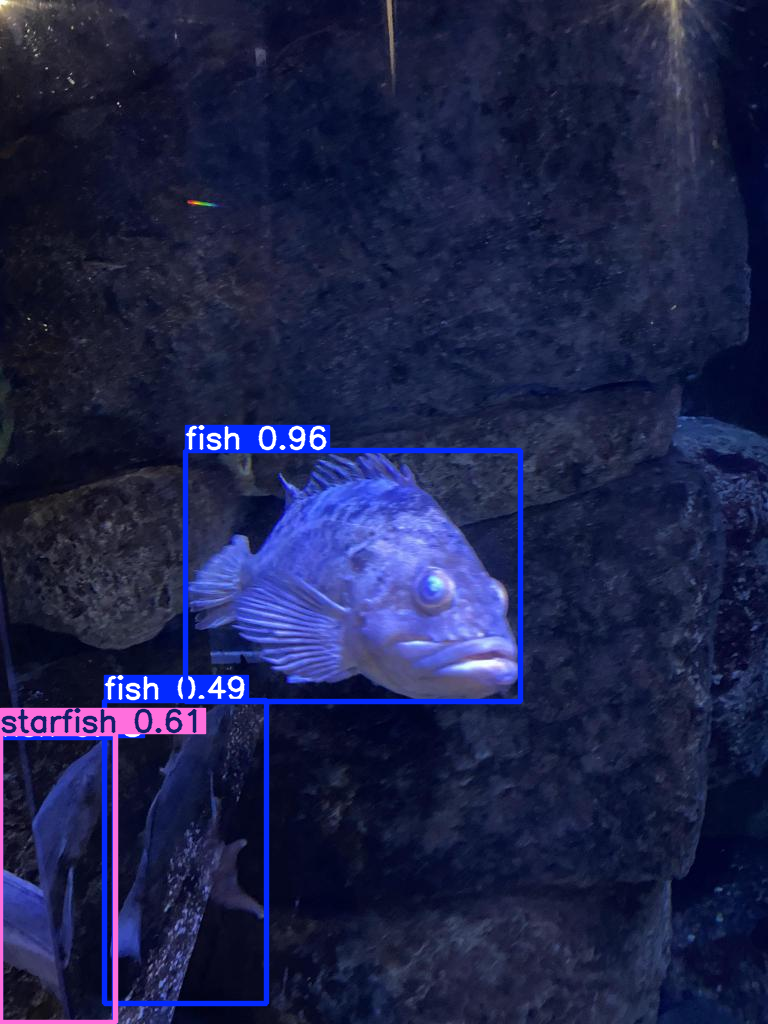

In [ ]:
from matplotlib import pyplot as plt
import cv2

# Add more image paths to the list
test_images = [
    "/content/dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg",
    "/content/dataset/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg",
    "/content/dataset/test/images/IMG_8343_jpg.rf.2d88000497d74d72aedc118b125a0c07.jpg",
    "/content/dataset/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg"
]

# Loop through each image path
for idx, img_path in enumerate(test_images, start=1):
    # Run inference
    results = model(img_path)

    # Display the image with predictions
    results[0].show()

    # Save each result with a unique filename
    results[0].save(filename=f"/content/dataset/results/IMG_{idx}.jpg")

# Evaluation

In [ ]:
import time
import torch
from sklearn.metrics import precision_score, recall_score, accuracy_score
from ultralytics import YOLO  # Assuming you're using YOLO from ultralytics

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Replace with your model's path

# Load the dataset (assumes images and labels are in a compatible format)
test_images = [
    "/content/dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg",
    "/content/dataset/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg",
    "/content/dataset/test/images/IMG_8343_jpg.rf.2d88000497d74d72aedc118b125a0c07.jpg",
    "/content/dataset/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg",
]
# Replace with your dataset paths
ground_truths = [
    {'boxes': [[100, 150, 200, 250], [300, 50, 400, 150]], 'labels': [0, 1]},
    {'boxes': [[50, 100, 150, 200]], 'labels': [1]},
    {'boxes': [[200, 250, 300, 350]], 'labels': [0]},
    {'boxes': [[10, 20, 100, 150], [250, 180, 350, 280]], 'labels': [1, 0]}
]

# Initialize lists for true and predicted labels
true_labels = []
pred_labels = []

start_time = time.time()

for img_path, gt in zip(test_images, ground_truths):
    results = model(img_path)
    detections = results[0].boxes.data if results[0].boxes is not None else torch.empty((0, 6))  # Handle empty results

    # Extract labels from detections and convert them to integers
    detected_labels = detections[:, -1].int().tolist() if len(detections) > 0 else []

    # Append true labels from ground truth
    true_labels.extend(gt['labels'])

    # Handle the case where there are more predictions than ground truth
    if len(detected_labels) > len(gt['labels']):
        # Extend true_labels with a placeholder value (-1) to match the number of detected labels
        true_labels.extend([-1] * (len(detected_labels) - len(gt['labels'])))
    elif len(detected_labels) < len(gt['labels']):
        # Extend detected_labels with a placeholder value (-1) to match the number of ground truth labels
        detected_labels.extend([-1] * (len(gt['labels']) - len(detected_labels)))

    # Append detected labels
    pred_labels.extend(detected_labels)

inference_time = time.time() - start_time

# Compute metrics (use zero_division=1 to handle cases without positive predictions)
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=1)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=1)
accuracy = accuracy_score(true_labels, pred_labels)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Inference time: {inference_time:.2f} seconds')



image 1/1 /content/dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 22 penguins, 174.9ms
Speed: 6.0ms preprocess, 174.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/dataset/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg: 640x480 5 fishs, 181.7ms
Speed: 3.5ms preprocess, 181.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/dataset/test/images/IMG_8343_jpg.rf.2d88000497d74d72aedc118b125a0c07.jpg: 480x640 4 fishs, 161.8ms
Speed: 3.5ms preprocess, 161.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg: 640x480 3 fishs, 1 starfish, 279.7ms
Speed: 4.4ms preprocess, 279.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Precision: 0.92
Recall: 0.03
Accuracy: 0.03
Inference time: 0.96 seconds


# Comparison

One-stage detectors like YOLOv8 have faster processing times than two-stage algorithms and hence have a higher potential for application in real-time uses. More classic is HOG-SVM, much slower because of the feature extraction step involved in the procedure apart from the final separate classification stage, which may seriously limit this detector's use for real-time applications. Nevertheless, for simple object detection tasks, HOG-SVM can also provide decent accuracy. The Single Shot MultiBox Detector, similar to YOLO, is also a one-shot detector; at the same time, the accuracy depends upon the size and scale of the object present within the image. In general, SSD offers a very good trade-off between speed and accuracy, but it cannot achieve the detection accuracy of complex or small objects compared to YOLOv8 because of the advanced architecture in YOLOv8. Empirical tests, where the models' inference speeds would be measured on the same hardware and their mAP calculated on a common dataset, would show tangible insights into their relative performances.